In [83]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt

In [84]:
data=pd.read_csv("df_mix.csv")
data

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,vacaciones,clases_verano,Hay_Sol,temp
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10
26396,2019-04-01 00:45:00,50.980,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10
26397,2019-04-01 00:30:00,51.873,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10
26398,2019-04-01 00:15:00,51.186,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10


In [85]:
from datetime import datetime

data['timestamp_numeric'] = data['DateTime'].apply(lambda x: int(datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timestamp()))

data

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,vacaciones,clases_verano,Hay_Sol,temp,timestamp_numeric
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,1577861100
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,1577860200
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,1577859300
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,1577858400
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,1577857500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,1554102000
26396,2019-04-01 00:45:00,50.980,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,1554101100
26397,2019-04-01 00:30:00,51.873,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,1554100200
26398,2019-04-01 00:15:00,51.186,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,1554099300


In [86]:
data["temp"].describe()

count    26400.000000
mean        10.176341
std         86.541541
min       -999.900000
25%         15.560000
50%         17.800000
75%         20.000000
max         34.400000
Name: temp, dtype: float64

In [87]:
data = data[data['temp'] >= 0]
data.describe()

,RealPower,mes,verano,primavera,otoño,invierno,dia,vacaciones,clases_verano,Hay_Sol,temp,timestamp_numeric
count,26208.000000,26208.000000,26208.000000,26208.000000,26208.000000,26208.000000,26208.000000,26208.000000,26208.000000,26208.0,26208.000000,2.620800e+04
mean,48.320322,7.992674,0.336996,0.223443,0.326007,0.113553,15.673993,0.483516,0.249084,0.0,17.576167,1.565931e+09
std,5.737717,2.583446,0.472693,0.416561,0.468759,0.317274,8.764477,0.499738,0.432491,0.0,3.856616,6.862346e+06
min,-1.161000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,5.000000,1.554098e+09
25%,45.870750,6.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.0,15.560000,1.559995e+09
50%,48.329500,8.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.0,17.800000,1.565892e+09
75%,51.811250,10.000000,1.000000,0.000000,1.000000,0.000000,23.000000,1.000000,0.000000,0.0,20.000000,1.571788e+09
max,82.339000,12.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,0.0,34.400000,1.577861e+09


In [88]:
total_filas = data.shape[0]

porcentaje_entrenamiento = 0.8

# Calcula el número de filas para entrenamiento y prueba
num_filas_entrenamiento = int(total_filas * porcentaje_entrenamiento)
num_filas_prueba = total_filas - num_filas_entrenamiento

# Divide los datos
X_train = data[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol", "temp", "timestamp_numeric"]][:num_filas_entrenamiento]
Y_train = data["RealPower"][:num_filas_entrenamiento]
X_test = data[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol", "temp", "timestamp_numeric"]][num_filas_entrenamiento:]
Y_test = data["RealPower"][num_filas_entrenamiento:]

print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)


Train set: (20966, 11) (20966,)
Test set: (5242, 11) (5242,)


In [89]:
X_train_array = X_train.to_numpy()
Y_train_array = Y_train.to_numpy()

# Creating a DataFrame from the NumPy arrays
df = pd.DataFrame({
    "mes": X_train_array[:, 0],
    "verano": X_train_array[:, 1],
    "primavera": X_train_array[:, 2],
    "otoño": X_train_array[:, 3],
    "invierno": X_train_array[:, 4],
    "dia": X_train_array[:, 5],
    "vacaciones": X_train_array[:, 6],
    "clases_verano": X_train_array[:, 7],
    "Hay_Sol": X_train_array[:, 8],
    "temp": X_train_array[:, 9],
    "timestamp_numeric": X_train_array[:, 10],
    "RealPower": Y_train_array.flatten()
})

In [90]:
s1=MinMaxScaler(feature_range=(-1,1))
Xs=s1.fit_transform(df[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol", "temp","timestamp_numeric"]])

s2=MinMaxScaler(feature_range=(-1,1))
Ys=s2.fit_transform(df[["RealPower"]])

In [91]:
window=70
X=[]
Y=[]
for i in range(window, len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])
X,Y=np.array(X), np.array(Y)


In [92]:
model=Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 11)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error",
              metrics=["accuracy", ])

es=EarlyStopping(monitor="loss", mode="min",
                 verbose=1, patience=10)

t0=time.time()

history=model.fit(X,Y,epochs=10,batch_size=250,
                  callbacks=[es], verbose=1)

t1=time.time()

print("Runtime:%.2f s" % (t1-t0))

Epoch 1/10
84/84 [==============================] - 32s 265ms/step - loss: 0.0146 - accuracy: 4.7856e-05
Epoch 2/10
84/84 [==============================] - 24s 283ms/step - loss: 0.0104 - accuracy: 0.0000e+00
Epoch 3/10
84/84 [==============================] - 24s 288ms/step - loss: 0.0098 - accuracy: 0.0000e+00
Epoch 4/10
84/84 [==============================] - 24s 287ms/step - loss: 0.0096 - accuracy: 0.0000e+00
Epoch 5/10
84/84 [==============================] - 25s 293ms/step - loss: 0.0093 - accuracy: 0.0000e+00
Epoch 6/10
84/84 [==============================] - 25s 292ms/step - loss: 0.0091 - accuracy: 4.7856e-05
Epoch 7/10
84/84 [==============================] - 25s 303ms/step - loss: 0.0090 - accuracy: 4.7856e-05
Epoch 8/10
84/84 [==============================] - 29s 350ms/step - loss: 0.0089 - accuracy: 0.0000e+00
Epoch 9/10
84/84 [==============================] - 26s 311ms/step - loss: 0.0088 - accuracy: 4.7856e-05
Epoch 10/10
84/84 [==============================] - 29

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


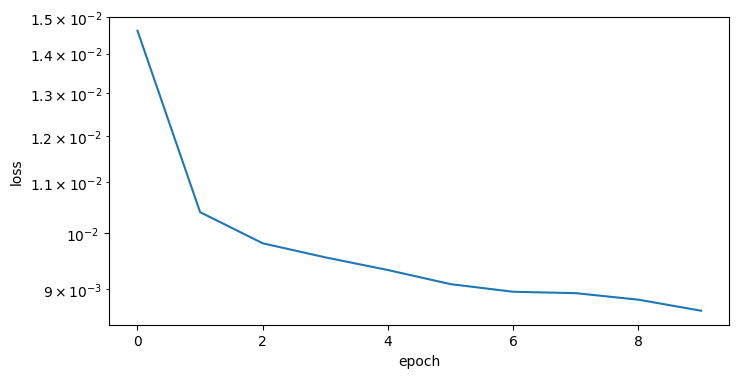

In [93]:
plt.figure(figsize=(8,4))
plt.semilogy(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
model.save("model")

In [94]:
Yp=model.predict(X)

Yu=s2.inverse_transform(Yp)
Ym=s2.inverse_transform(Y)

653/653 [==============================] - 20s 28ms/step


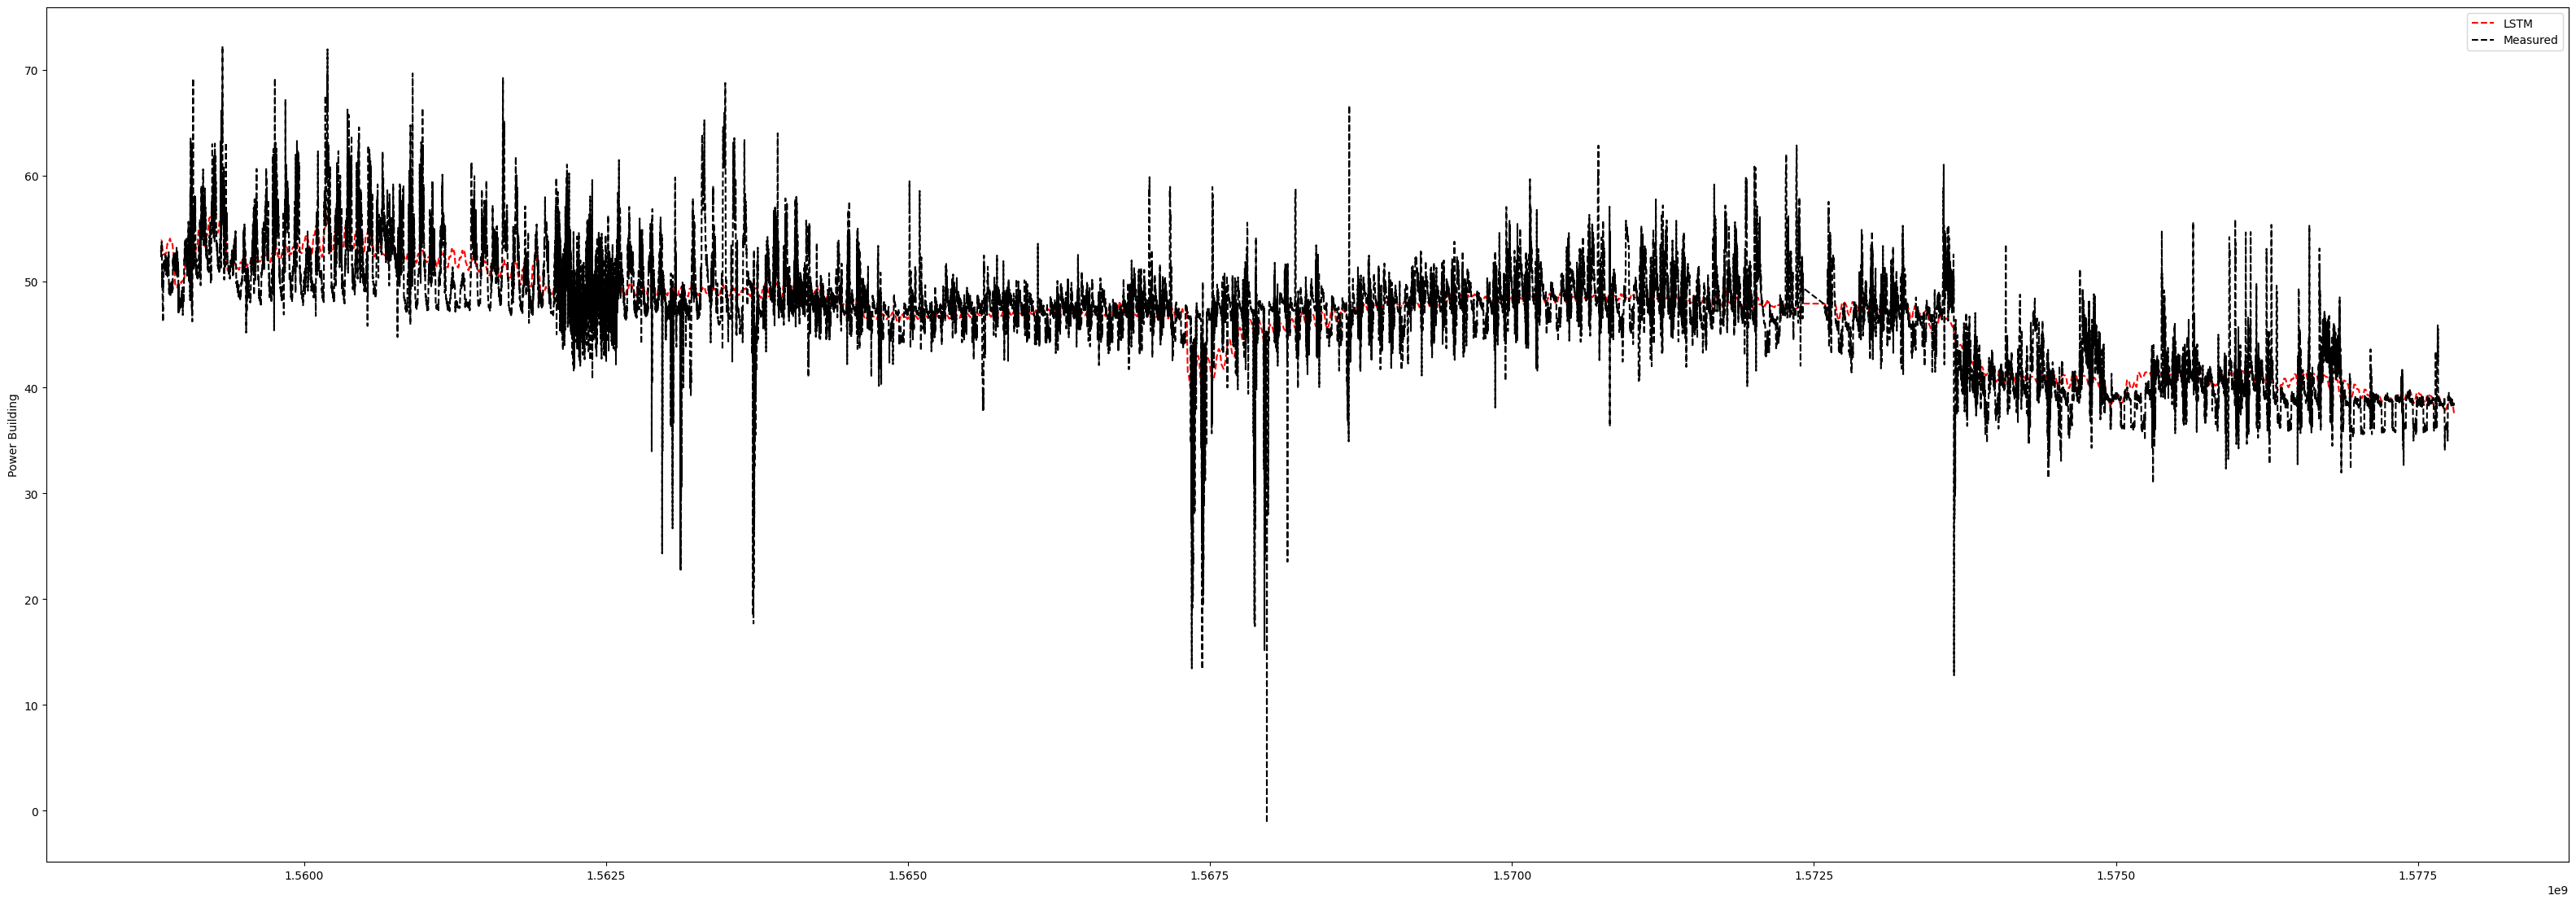

In [95]:
plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot(df["timestamp_numeric"][window:], Yu, "r--", label="LSTM")
plt.plot(df["timestamp_numeric"][window:], Ym, "k--", label="Measured")
plt.ylabel("Power Building")
plt.legend()

In [96]:
v=load_model("model")

X_test_array = X_test.to_numpy()
Y_test_array = Y_test.to_numpy()

test = pd.DataFrame({
    "mes": X_test_array[:, 0],
    "verano": X_test_array[:, 1],
    "primavera": X_test_array[:, 2],
    "otoño": X_test_array[:, 3],
    "invierno": X_test_array[:, 4],
    "dia": X_test_array[:, 5],
    "vacaciones": X_test_array[:, 6],
    "clases_verano": X_test_array[:, 7],
    "Hay_Sol": X_test_array[:, 8],
    "temp": X_test_array[:, 9],
    "timestamp_numeric": X_test_array[:, 10],
    "RealPower": Y_test_array.flatten()
})

In [97]:
Xt=test[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol", "temp","timestamp_numeric"]
].values
Yt=test[["RealPower"]].values

In [98]:
Xts=s1.transform(Xt)
Yts=s2.transform(Yt)

C:\Users\giuliana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\giuliana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [99]:
Yti=[]
Xti=[]

for i in range(window, len (Xts)):
    Xti.append(Xts[i-window:i,:])
    Yti.append(Yts[i])

Xti,Yti=np.array(Xti), np.array(Yti)

In [100]:
Ytp=model.predict(Xti)

Ytu=s2.inverse_transform(Ytp)
Ytm=s2.inverse_transform(Yti)

162/162 [==============================] - 6s 26ms/step


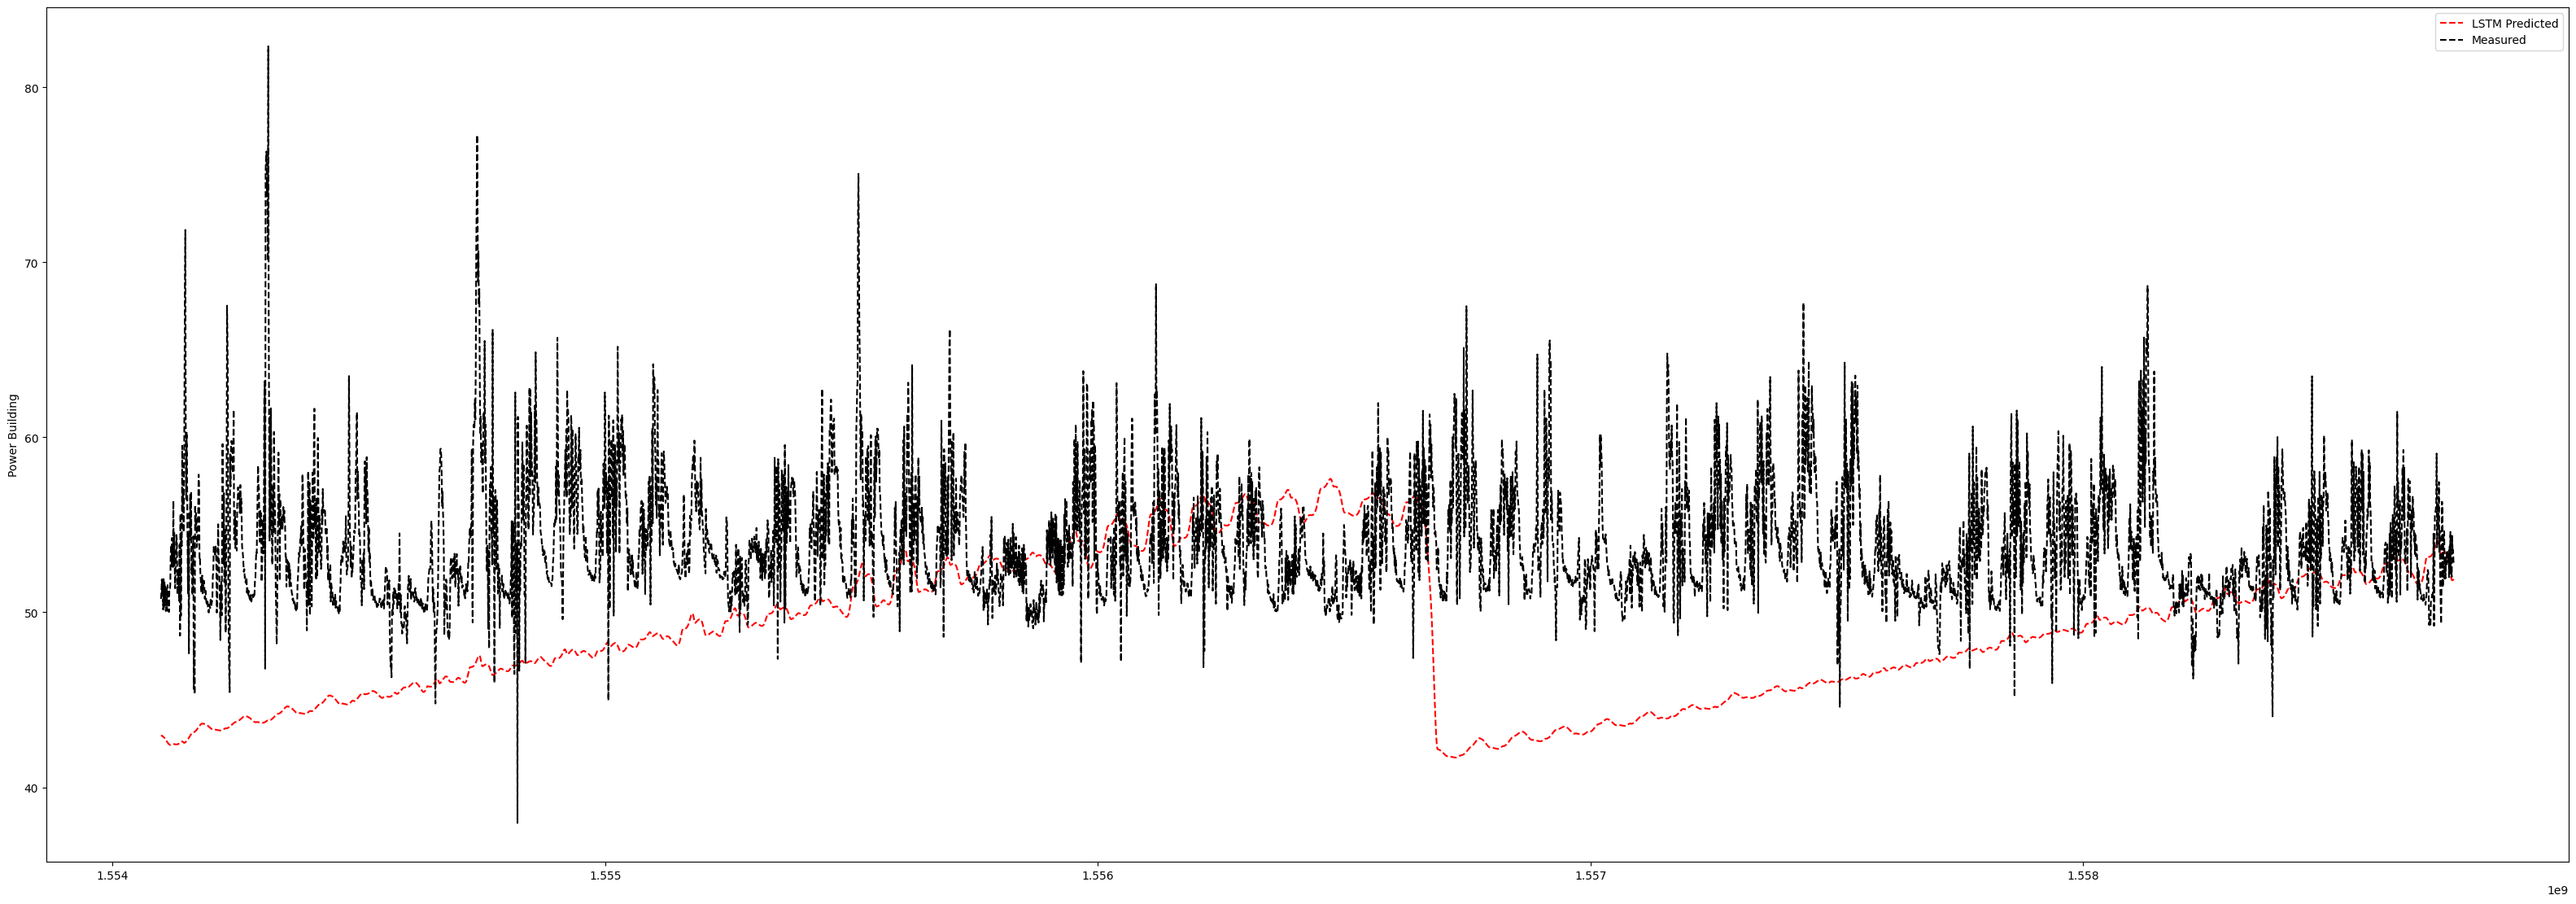

In [101]:
plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot(test["timestamp_numeric"][window:], Ytu, "r--", label="LSTM Predicted")
plt.plot(test["timestamp_numeric"][window:], Ytm, "k--", label="Measured")
plt.ylabel("Power Building")
plt.legend()